Enunciado: https://gist.github.com/fraimondo/9f779d083a47c18800130ca8d1b143b9

## TP3

Integrantes:
* Martín Fosco LU: 449/13
* Javier Minces LU: 231/13

### Imports

In [1]:
import scipy.signal as sig
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import sklearn as sck

### 1

In [2]:
def entropy(series):
    hist = np.histogram(series, bins = "scott")
    suma = float(sum(hist[0]))
    return -sum([i/suma * math.log(i/suma) for i in hist[0] if i!=0])

Procesamiento: promediamos los electrodos. Para cada epoch obtenemos una serie temporal. Le aplicamos la FFT y dividimos en bandas. Esto nos da un DataFrame de 20 pacientes x ~800 epochs x 5 bandas. También calculamos la entropía. 

In [3]:
bandas = [0, 4, 8, 13, 30, 45]
nombres_bandas = ["delta", "theta", "alpha", "beta", "gamma"]
pacientes = [l + str(i).zfill(2) for l in "PS" for i in range(1,11)] 

df_arrays = []
entropies = []
indices = [[], []]
for paciente in pacientes:
    #"../TP2/" = path_to matrices
    test = sio.loadmat("../TP2/" + paciente + ".mat")["data"]
    avg1 = np.mean(test, axis = 1)
    for epoch in range(len(avg1)):
        epochData = avg1[epoch]
        freq, pot = sig.welch(epochData, fs = 250, nfft = 2048)
        array_de_banda = []
        for i in range(len(bandas) -1):
            inicio, fin = bandas[i], bandas[i+1]
            suma = sum([pot[i] for i in range(len(pot)) if freq[i] >= inicio and freq[i] < fin])
            array_de_banda.append(suma)
        indices[0].append(paciente)
        indices[1].append(epoch)
        df_arrays.append(array_de_banda)
        entropies.append(entropy(epochData))
    
        
df_posta = pd.DataFrame(df_arrays, index = indices, columns = nombres_bandas)
df_posta

/home/karamchand/.local/lib/python2.7/site-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


delta         theta         alpha          beta         gamma
P01 0    3.413088e-13  2.249417e-13  5.214939e-14  7.825837e-13  8.693997e-13
    1    2.009992e-13  3.802707e-14  9.360180e-14  5.411597e-13  5.105529e-13
    2    1.159639e-13  1.783450e-13  9.649088e-14  5.185177e-13  1.021965e-12
    3    1.905056e-13  3.012133e-14  7.482931e-14  6.540712e-13  4.544534e-13
    4    1.427269e-13  1.452194e-13  6.952966e-14  4.616906e-13  7.141793e-13
    5    2.487538e-13  6.444247e-14  5.711892e-14  7.843957e-13  8.023183e-13
    6    1.590618e-12  7.043523e-14  2.678550e-13  4.722026e-13  1.045735e-12
    7    9.586633e-13  4.594750e-14  4.122278e-14  4.604703e-13  7.787155e-13
    8    7.071685e-14  9.237953e-14  2.361365e-13  2.804996e-13  1.059912e-12
    9    4.759120e-13  1.664895e-13  6.594069e-14  6.446086e-13  1.074915e-12
    10   1.903098e-14  2.510709e-14  2.261281e-13  5.048109e-13  5.124965e-13
    11   2.468824e-13  3.132233e-14  6.652083e-14  7.983295e-13  5.264386e-13
    12   2.008656e-13  9.710312e-14  5.675089e-14  7.679758e-13  1.019466e-12
    13   1.214802e-13  3.955758e-14  3.874406e-14  4.520901e-13  1.107109e-12
    14   1.820449e-13  9.142091e-14  5.744200e-14  4.800986e-13  5.460850e-13
    15   5.817906e-14  7.192182e-14  3.437850e-14  4.983650e-13  3.320344e-13
    16   8.222093e-14  4.132446e-14  1.798588e-13  5.968709e-13  6.854791e-13
    17   7.109114e-14  7.659814e-14  1.136880e-13  6.232433e-13  5.984014e-13
    18   1.810300e-13  1.579532e-14  1.015186e-13  4.364986e-13  6.833257e-13
    19   2.542549e-13  2.014010e-14  5.464718e-14  3.245308e-13  5.363849e-13
    20   6.563833e-13  8.638026e-14  1.003511e-13  4.391822e-13  7.889163e-13
    21   1.151910e-13  4.890403e-14  3.573852e-14  2.303433e-13  5.904661e-13
    22   4.323912e-13  7.569265e-14  8.922955e-14  4.133728e-13  5.910851e-13
    23   4.005683e-13  9.074379e-14  1.115114e-13  2.894537e-13  4.865862e-13
    24   3.885500e-13  4.517519e-14  2.092833e-14  3.340464e-13  4.984932e-13
    25   2.921007e-13  1.226459e-13  9.061495e-14  5.639213e-13  4.517046e-13
    26   1.491522e-13  8.676230e-15  4.422317e-14  3.739565e-13  3.849794e-13
    27   6.612162e-13  4.974629e-13  1.322979e-13  7.246749e-13  1.791784e-12
    28   6.052606e-13  7.777268e-14  1.237889e-13  6.924789e-13  1.353908e-12
    29   3.497741e-13  1.079084e-13  6.831707e-14  6.888689e-13  1.268385e-12
...               ...           ...           ...           ...           ...
S10 737  1.596323e-14  4.269646e-14  7.161941e-14  2.202877e-14  9.044440e-15
    738  1.439190e-13  1.712547e-14  1.105539e-14  2.759707e-14  1.069896e-14
    739  4.587319e-13  9.539568e-14  6.171298e-15  4.602891e-14  1.215305e-14
    740  3.166846e-13  4.234679e-14  1.200820e-14  2.766252e-14  1.471363e-14
    741  1.338963e-13  1.055265e-14  3.023763e-14  4.468581e-14  2.419288e-14
    742  2.371679e-13  3.196429e-14  2.243229e-14  5.635834e-14  1.664384e-14
    743  2.591644e-14  4.879384e-14  9.631356e-14  8.122093e-14  1.607913e-14
    744  1.536967e-13  7.463535e-14  3.624056e-14  2.826012e-14  3.819318e-14
    745  2.517610e-13  2.285829e-14  5.318838e-14  1.825293e-14  1.149543e-14
    746  1.269243e-14  2.178435e-14  9.878847e-15  7.055937e-14  1.060485e-14
    747  1.265522e-13  1.152401e-14  4.334733e-14  1.433891e-14  1.291514e-14
    748  9.177869e-14  1.023240e-14  2.286892e-14  3.393609e-14  8.010112e-15
    749  5.434549e-14  9.049276e-14  3.034082e-14  1.584106e-14  1.227603e-14
    750  3.286983e-13  1.527656e-14  8.627095e-15  1.336417e-14  6.321741e-15
    751  4.176950e-14  2.657353e-14  3.142091e-14  5.389731e-14  2.610962e-14
    752  1.759775e-13  1.628486e-14  1.768134e-14  5.612720e-14  7.734898e-15
    753  1.604873e-13  2.527141e-14  4.953213e-14  7.025980e-14  6.544156e-14
    754  2.059460e-13  2.189743e-14  6.222202e-14  2.808981e-14  2.435716e-14
    755  8.957746e-14  2.738657e-14  6.527982e-14  3.201824e-14  9.508523e-15
    756  1.213400e-14  3.621142e-14  2

In [4]:
df_entropies = pd.DataFrame(entropies, index = indices, columns = ["entropy"])
df_entropies

entropy
P01 0    1.933399
    1    1.933971
    2    1.927044
    3    1.961362
    4    1.932806
    5    1.962705
    6    1.986305
    7    2.019309
    8    1.998959
    9    1.968353
    10   1.979882
    11   1.966389
    12   1.922682
    13   1.899389
    14   1.956319
    15   2.015062
    16   1.932486
    17   1.956947
    18   1.925327
    19   1.950831
    20   1.922104
    21   1.937442
    22   1.954220
    23   1.961107
    24   1.992693
    25   1.915307
    26   1.884114
    27   1.985797
    28   2.024509
    29   1.952070
...           ...
S10 737  1.966317
    738  1.983378
    739  1.954233
    740  1.855717
    741  1.888181
    742  1.900152
    743  1.869352
    744  1.958474
    745  1.898686
    746  1.897289
    747  2.009658
    748  1.992057
    749  1.982992
    750  1.827015
    751  1.959846
    752  1.942964
    753  1.989263
    754  1.979801
    755  1.930508
    756  1.915922
    757  1.981172
    758  1.921473
    759  1.695350
    760  2.008456
    761  1.978836
    762  1.946801
    763  1.988724
    764  1.964909
    765  1.957275
    766  1.856514

[16065 rows x 1 columns]

### Entropía conjunta
Tomamos los electrodos relevantes. Armamos la probabilidad de cada combinación multipicando la probabilidad de cada bin de un electrodo por todas las combinaciones anteriors. Después calculamos log(p) * p para cada combinación posible.

In [21]:
### Tarda
electrodes = [8, 44, 80, 131, 185]

jentropies = []
indices = [[], []]
for paciente in pacientes:
    test = sio.loadmat("../TP2/" + paciente + ".mat")["data"]
    for epoch in range(len(test)):
        values = [1]
        for electrode in electrodes:
            hist = np.histogram(test[epoch][electrode], bins = "scott")
            suma = float(sum(hist[0]))
            probs = hist[0]/suma
            newvalues = []
            for x in values:
                newvalues = np.concatenate([newvalues, probs * x])
            values = newvalues
        indices[0].append(paciente)
        indices[1].append(epoch)
        jentropies.append(-sum([math.log(v)*v for v in values if v != 0]))
    
df_joint_entropies = pd.DataFrame(jentropies, index = indices, columns = ["joint entropy"])
df_joint_entropies

joint entropy
P01 0         9.784102
    1         9.744826
    2         9.156645
    3         9.722855
    4         9.485099
    5         9.523754
    6         9.320609
    7         9.274088
    8         9.298315
    9         9.720943
    10        9.727022
    11        9.855750
    12        9.574860
    13        9.759274
    14        9.785117
    15        9.769809
    16        9.733934
    17        9.549795
    18        9.663497
    19        9.764886
    20        9.647932
    21        9.434059
    22        9.521706
    23        9.658982
    24        9.543145
    25        9.266127
    26        9.606503
    27        9.771924
    28        9.410500
    29        9.656335
...                ...
S10 737       9.644733
    738       9.572148
    739       9.526949
    740       9.475540
    741       9.524512
    742       9.821334
    743       9.807877
    744       9.610471
    745       9.365074
    746       9.655286
    747       9.787633
    748       9.847013
    749       9.676706
    750       9.734828
    751       9.673934
    752       9.612275
    753       9.678940
    754       9.724510
    755       9.554087
    756       9.657835
    757       9.662369
    758       9.789793
    759       9.613983
    760       9.780416
    761       9.578637
    762       9.669552
    763       9.751767
    764       9.717209
    765       9.712299
    766       9.595410

[16065 rows x 1 columns]

Normalizamos las bandas. Armamos un DataFrame de 20 pacientes x 24 features. Las features las obtenemos calculando el promedio y el desvío estándar sobre las 12 columnas que teníamos (5 bandas, 5 bandas normalizadas, entropía y entropía conjunta)

In [23]:
df_norm = df_posta.div(df_posta.sum(axis=1), axis=0)
means = df_posta.mean(axis = 0, level = 0)
sd = df_posta.std(axis = 0, level = 0)
means_norm = df_norm.mean(axis = 0, level = 0)
sd_norm = df_norm.std(axis = 0, level = 0)
entropy_means = df_entropies.mean(axis = 0, level = 0)
entropy_sd = df_entropies.std(axis = 0, level = 0)
jentropy_means = df_joint_entropies.mean(axis = 0, level = 0)
jentropy_sd = df_joint_entropies.std(axis = 0, level = 0)

features = means
features = features.join(sd, lsuffix=' mean', rsuffix=' sd')
features = features.join(means_norm)
features = features.join(sd_norm, lsuffix=' mean_norm', rsuffix=' sd_norm')
features = features.join(entropy_means)
features = features.join(entropy_sd, rsuffix = " sd")
features = features.join(jentropy_means)
features = features.join(jentropy_sd, rsuffix = " sd")

features

,delta mean,theta mean,alpha mean,beta mean,gamma mean,delta sd,theta sd,alpha sd,beta sd,gamma sd,...,gamma mean_norm,delta sd_norm,theta sd_norm,alpha sd_norm,beta sd_norm,gamma sd_norm,entropy,entropy sd,joint entropy,joint entropy sd
P01,6.474048e-13,1.100986e-13,4.915512e-14,1.215176e-13,1.079005e-13,8.438173e-13,1.085643e-13,4.300826e-14,1.762332e-13,2.364435e-13,...,0.093391,0.255662,0.113970,0.060397,0.116634,0.137950,1.881216,0.093278,9.389714,0.315170
P02,1.773805e-12,4.384172e-13,3.845398e-14,4.190222e-14,2.872480e-14,1.561659e-12,4.418096e-13,3.609953e-14,3.390900e-14,3.185065e-14,...,0.018220,0.231751,0.203750,0.027736,0.029916,0.024715,1.836943,0.102830,9.324000,0.279388
P03,4.802599e-13,3.555275e-14,1.217894e-14,9.120573e-15,5.476067e-15,5.234544e-13,2.733030e-14,9.021652e-15,6.819887e-15,4.865489e-15,...,0.021497,0.173345,0.101005,0.051125,0.035898,0.026825,1.811776,0.125687,9.196931,0.299709
P04,7.785647e-14,2.989911e-14,6.859796e-15,2.399459e-15,7.913585e-16,1.005892e-13,2.557905e-14,6.603214e-15,2.000155e-15,1.023748e-15,...,0.010840,0.232626,0.191334,0.079399,0.030493,0.015844,1.863524,0.085464,9.380533,0.244224
P05,2.227245e-12,3.278892e-13,1.387457e-13,5.098322e-13,4.054396e-13,2.226175e-12,2.395002e-13,9.170506e-14,3.405645e-13,3.364389e-13,...,0.130271,0.214912,0.086591,0.036578,0.105956,0.095373,1.923449,0.058938,9.402059,0.230760
P06,4.480578e-14,5.796897e-15,2.947436e-15,2.015353e-15,4.322217e-16,8.385846e-14,8.323683e-15,2.714622e-15,2.710343e-15,5.937101e-16,...,0.012630,0.197511,0.119511,0.081611,0.066776,0.014145,1.856307,0.106948,9.353361,0.260171
P07,8.341240e-13,1.603714e-13,3.414281e-14,7.011479e-14,4.038596e-14,7.903372e-13,1.501119e-13,2.774715e-14,4.887120e-14,3.858830e-14,...,0.052786,0.194662,0.112323,0.040027,0.083938,0.053647,1.893824,0.076719,9.382206,0.255332
P08,9.140278e-13,1.924867e-13,2.798522e-14,2.311164e-14,1.043328e-14,1.454132e-12,2.609050e-13,3.124653e-14,2.745740e-14,1.940317e-14,...,0.015218,0.219839,0.171706,0.054306,0.045862,0.020046,1.828995,0.118855,9.395067,0.276298
P09,2.784133e-11,6.505424e-12,1.929685e-12,5.258367e-12,3.866779e-12,5.005802e-11,9.166444e-12,2.284302e-12,3.668938e-12,3.164736e-12,...,0.134761,0.231364,0.116943,0.042868,0.122528,0.105200,1.918047,0.068841,9.413591,0.219230
P10,8.970983e-15,2.895932e-15,8.947480e-16,8.537944e-16,4.169272e-16,8.657445e-15,2.358702e-15,8.198046e-16,1.489474e-15,1.181577e-15,...,0.026358,0.212920,0.155263,0.069704,0.063442,0.046208,1.855376,0.087736,9.394798,0.257782


### 2.1 a - Curvas ROC por feature

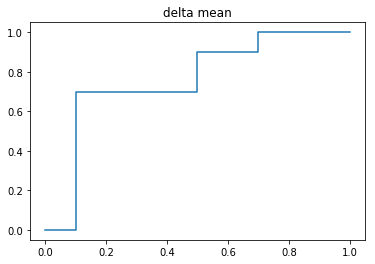

0.76


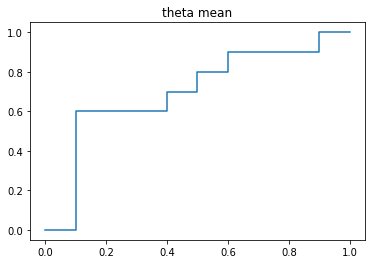

0.7


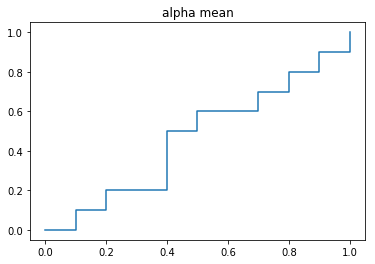

0.46


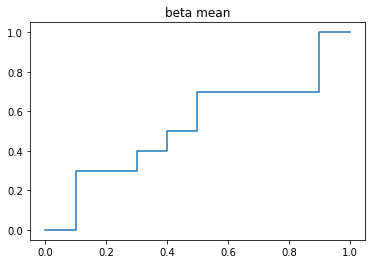

0.53


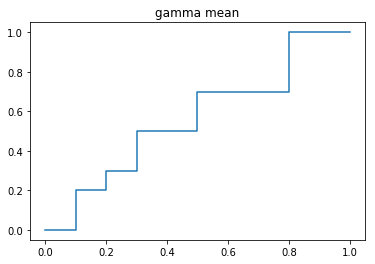

0.56


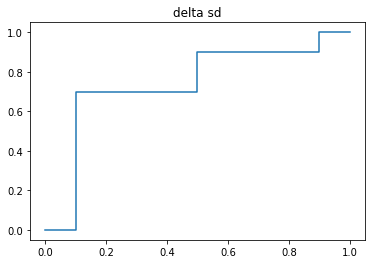

0.74


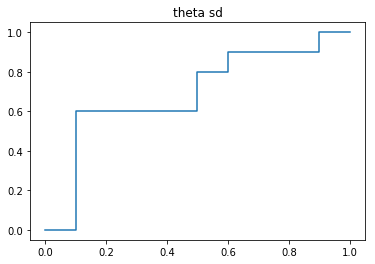

0.69


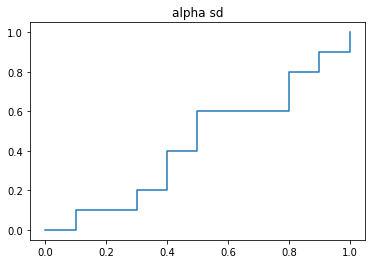

0.43


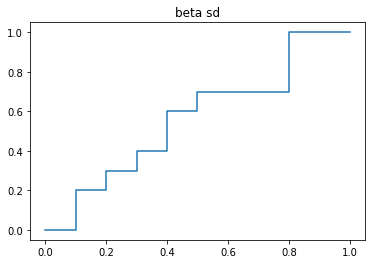

0.56


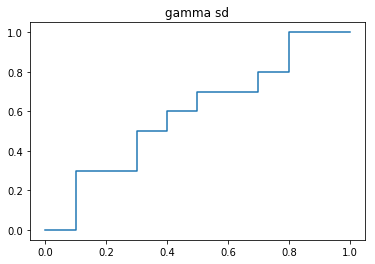

0.59


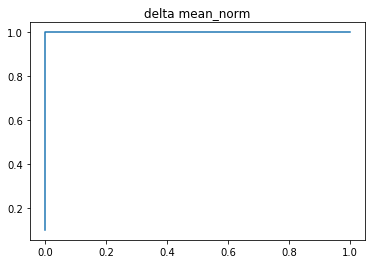

1.0


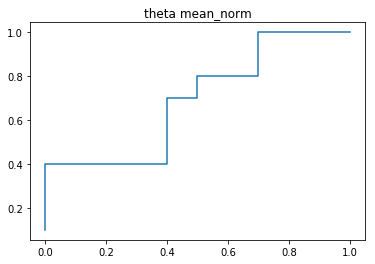

0.69


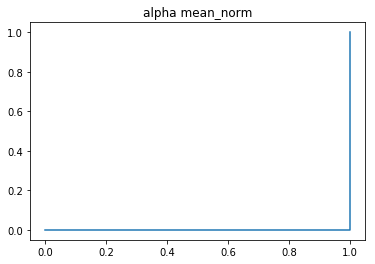

0.0


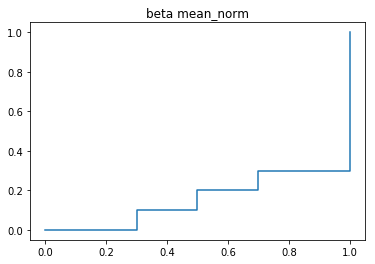

0.15


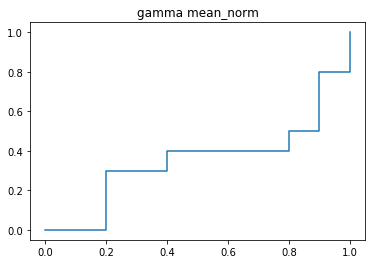

0.35


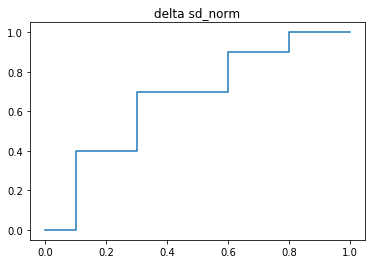

0.67


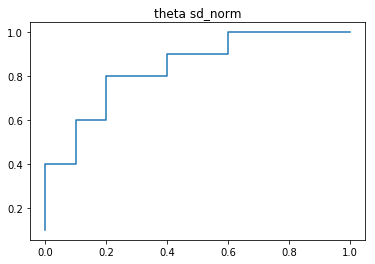

0.84


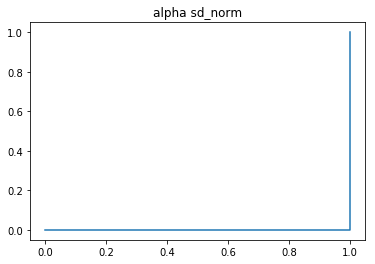

0.0


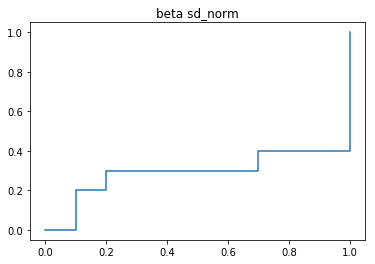

0.29


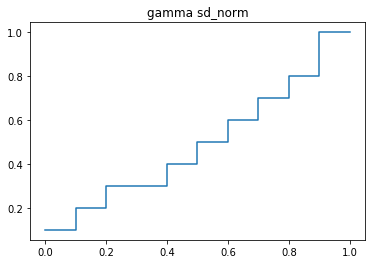

0.49


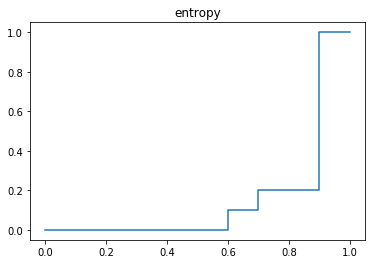

0.15


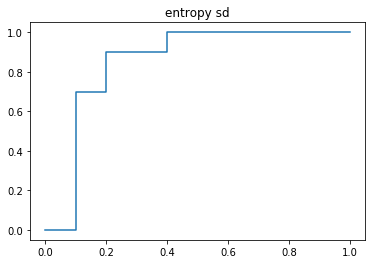

0.85


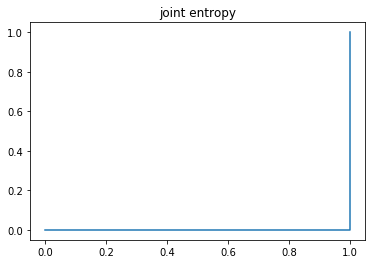

0.0


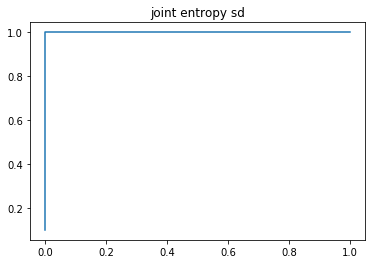

1.0


In [29]:
from sklearn import metrics
y_true = [n[0]=="P" for n in pacientes]
for column in features:
    y_score = features[column]
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    plt.title(column)
    plt.plot(fpr, tpr)
    plt.show()
    print metrics.roc_auc_score(y_true, y_score)


La mayoría de las features permiten clasificar. Delta y theta parecen ser las bandas más útiles. Los gráficos que tienen una curva con área cercana a 0 deberían leerse al revés; clasificar por variable en este caso implica setear un threshold a partir del cual todos los valores mayores se consideran como de pacientes "P", pero hay casos en los que los pacientes P corresponden a valores menores.

### 2.1 b - Graficado ROC con cross validation sobre Logistic Regression

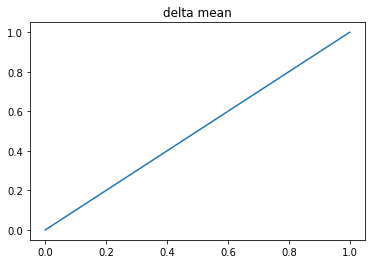

0.5


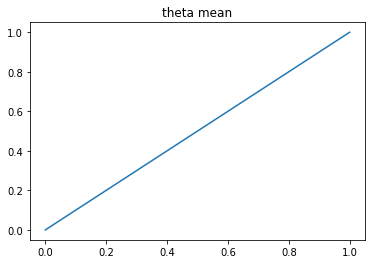

0.5


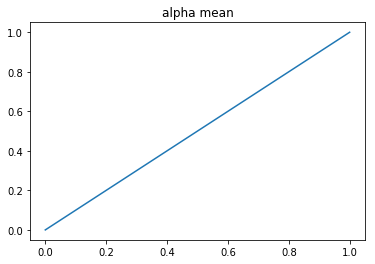

0.5


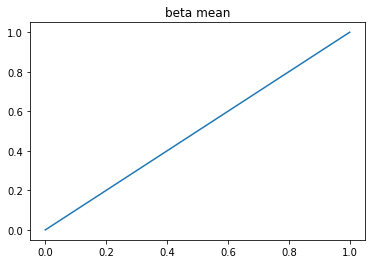

0.5


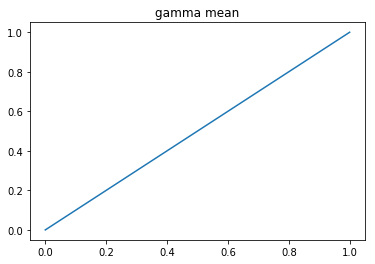

0.5


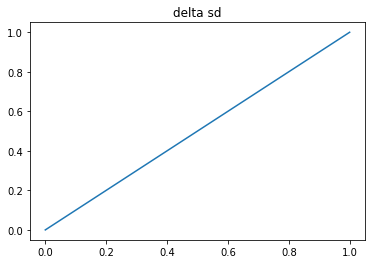

0.5


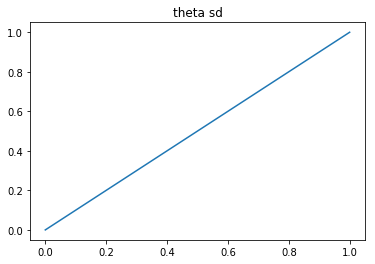

0.5


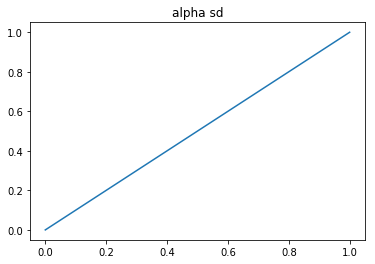

0.5


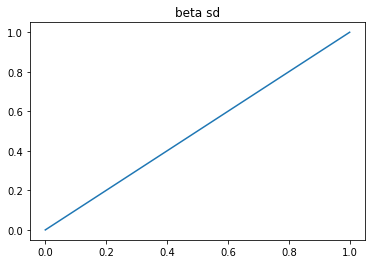

0.5


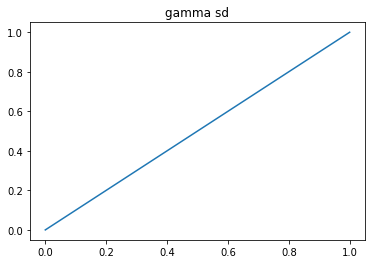

0.5


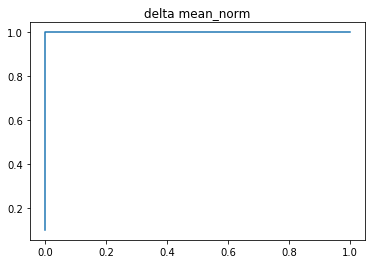

1.0


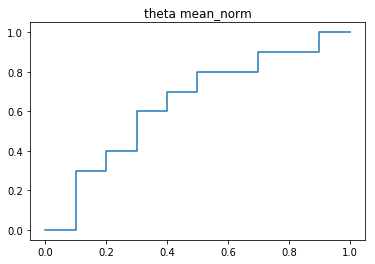

0.64


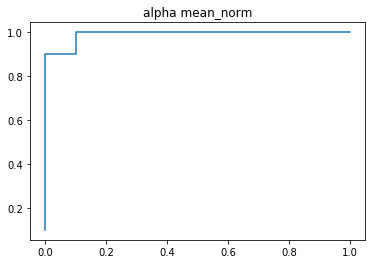

0.99


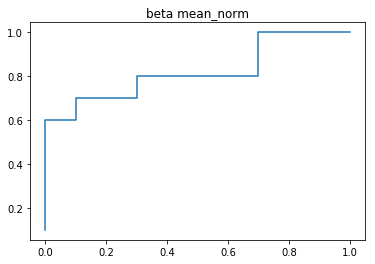

0.82


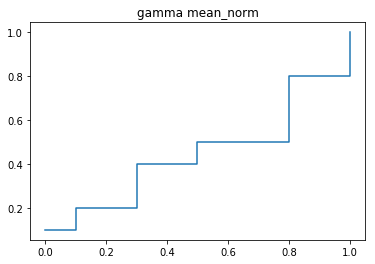

0.44


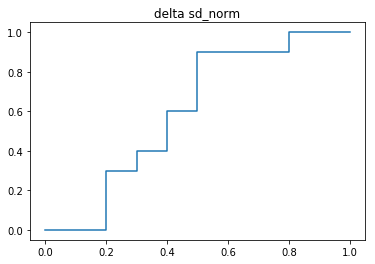

0.6


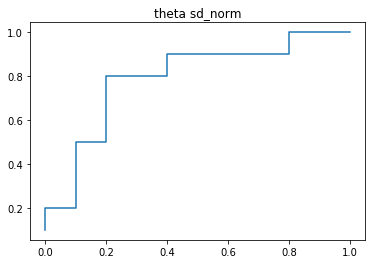

0.79


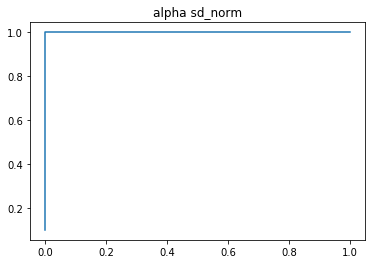

1.0


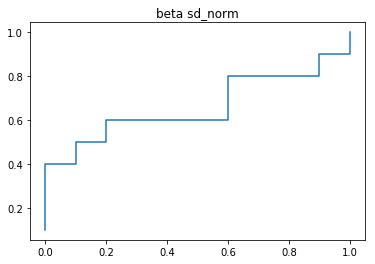

0.66


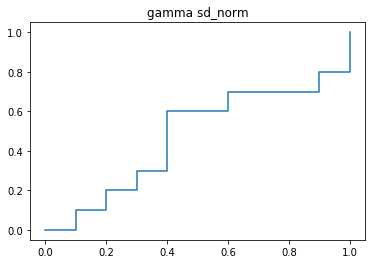

0.47


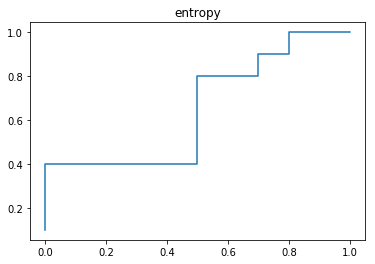

0.65


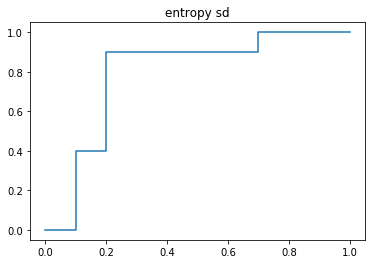

0.79


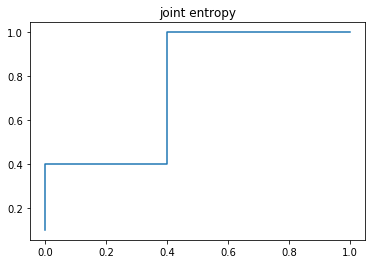

0.76


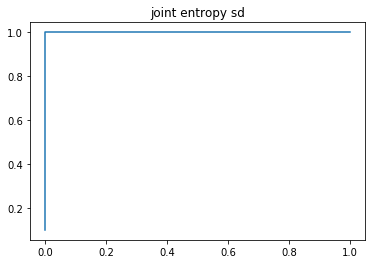

1.0


In [30]:
from sklearn import linear_model
from sklearn import model_selection

for column in features:
    x = features[column]
    y = np.array([n[0]=="P" for n in pacientes])
    x = x.values.reshape(-1,1)
    estimator = linear_model.LogisticRegression()
    result = model_selection.cross_val_predict(estimator, x, y, method = "predict_proba")
    y_score = [r[1] for r in result]
    fpr, tpr, thresholds = metrics.roc_curve(y, y_score)
    plt.plot(fpr, tpr)
    plt.title(column)
    plt.show()
    print metrics.roc_auc_score(y, y_score)

Para promedio y desvío de bandas no normalizadas el clasificador es completamente aleatorio. Los promedios de las potencias normalizadas de las bandas (salvo gamma) permiten clasificar con buena precisión para loss distintos valores de falsos positivos aceptables, siendo la clasificación perfecta en la banda delta. Los desvíos estándares solo funcionaron para alpha. El desvío estándar de la entropía también permite una buena clasificación

### 2.2 a - Curva ROC sobre un Support Vector Machine
Utilizando todas las features

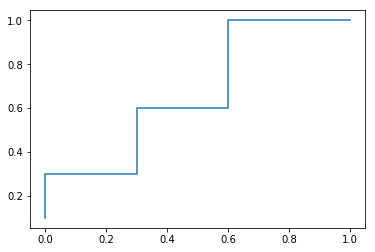

0.67


In [31]:
from sklearn import svm

x = features
y = np.array([n[0]=="P" for n in pacientes])
estimator = svm.SVC(probability = True)
result = model_selection.cross_val_predict(estimator, x, y, method = "predict_proba")
y_score = [r[0] for r in result]
fpr, tpr, thresholds = sck.metrics.roc_curve(y, y_score)
plt.plot(fpr, tpr)
plt.show()
print metrics.roc_auc_score(y, y_score)


El resultado es aceptable pero no mejor que el obtenido con las potencias normalizadas por separado

### 2.2 b - Pipeline: scaler => feature selection => svm

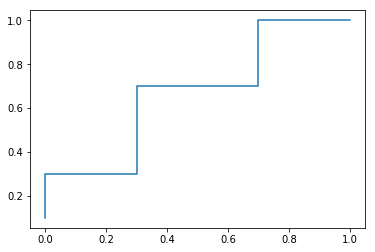

0.67


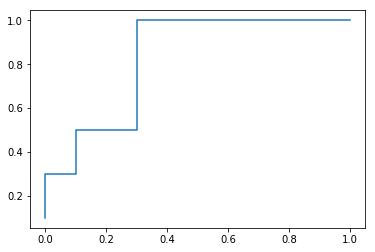

0.83


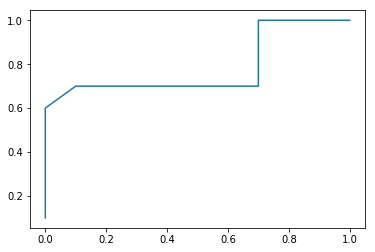

0.785


In [32]:
from sklearn import svm
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def pipeline(percentile):
    std_scaler = StandardScaler()
    f_select = sck.feature_selection.SelectPercentile(percentile = percentile)
    svc = svm.SVC(probability = False)
    pipeline = Pipeline(steps = [('stdscaler', std_scaler), ('fixtureSelection', f_select), ('svc', svc)])

    x = features
    y = np.array([n[0]=="P" for n in pacientes])
    result = model_selection.cross_val_predict(estimator, x, y, method = "predict_proba")
    y_score = [r[0] for r in result]
    fpr, tpr, thresholds = metrics.roc_curve(y, y_score)
    plt.plot(fpr, tpr)
    plt.show()
    print metrics.roc_auc_score(y, y_score)


pipeline(10)
pipeline(20)
pipeline(35)


Obtuvimos un mejor resultado con 20% de features que con 10% y con 35%. Suponemos que esto es porque ese es el porcentaje de features relevantes para clasificar; usar menos implica perder información, y usar más sólo agrega ruido.